#Random Forest

In [3]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [4]:
# Load the datasets
X_train = pd.read_csv("X_train_scaled.csv")
X_test = pd.read_csv("X_test_scaled.csv")

y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

### Build the Random Rorest Model

In [5]:
# Initialize the Random Forest Regressor and train the model
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train.values.ravel())
y_pred = rf_regressor.predict(X_test)

### Evaluate the Model Performance

In [6]:
# Calculate evaluation metrics
# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
# R-squared (R^2) Score
r2 = r2_score(y_test, y_pred)

# Print the results
print("=== Evaluation Metrics: ===")
print(f"Mean Squared Error (MSE): {mse:.5f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.5f}")
print(f"Mean Absolute Error (MAE): {mae:.5f}")
print(f"R-squared Score (R^2): {r2:.5f}")

=== Evaluation Metrics: ===
Mean Squared Error (MSE): 0.00185
Root Mean Squared Error (RMSE): 0.04300
Mean Absolute Error (MAE): 0.02906
R-squared Score (R^2): 0.86922


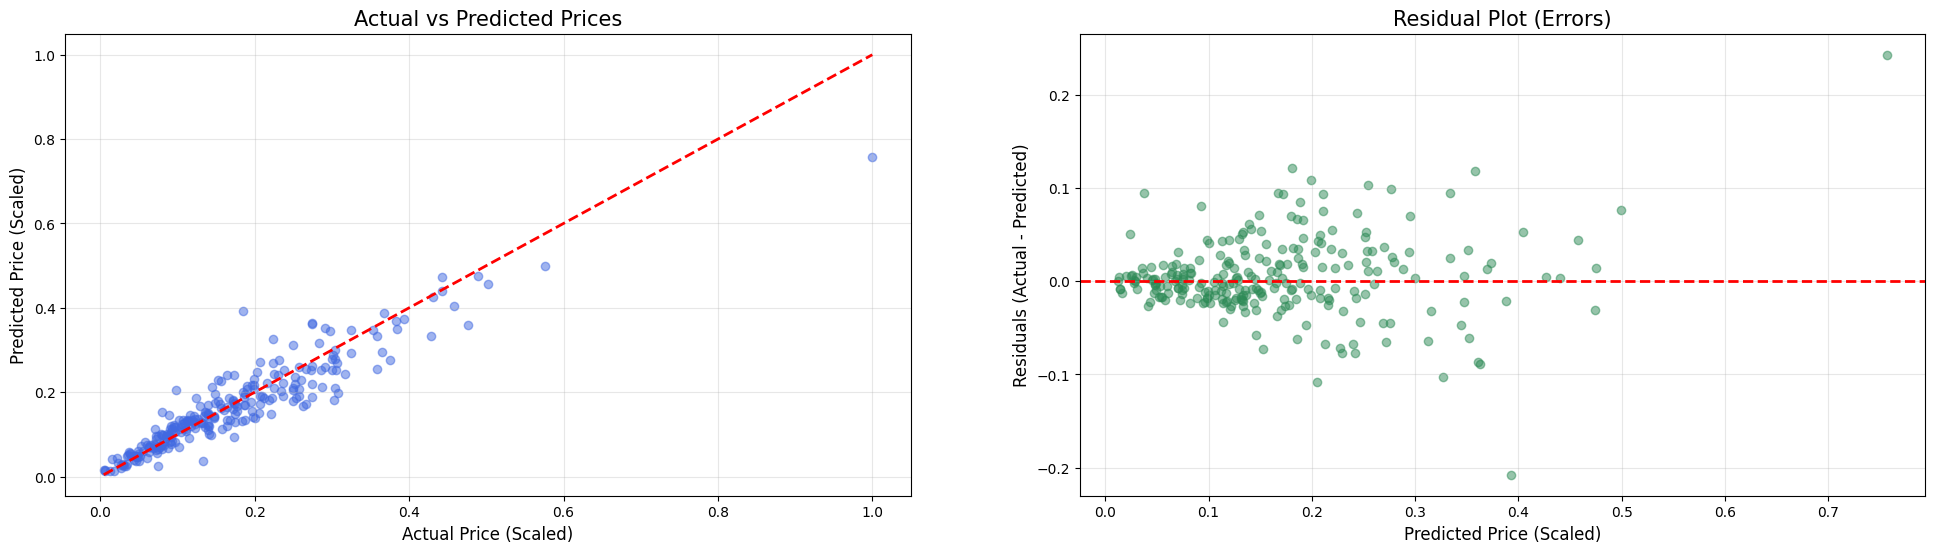

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# --- Actual vs Predicted Prices ---
axes[0].scatter(y_test, y_pred, alpha=0.5, color='royalblue')
min_val = min(y_test.values.min(), y_pred.min())
max_val = max(y_test.values.max(), y_pred.max())
axes[0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2)
axes[0].set_title('Actual vs Predicted Prices', fontsize=15)
axes[0].set_xlabel('Actual Price (Scaled)', fontsize=12)
axes[0].set_ylabel('Predicted Price (Scaled)', fontsize=12)
axes[0].grid(True, alpha=0.3)

# --- Residual Plot ---
residuals = y_test.values.ravel() - y_pred
axes[1].scatter(y_pred, residuals, alpha=0.5, color='seagreen')
axes[1].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1].set_title('Residual Plot (Errors)', fontsize=15)
axes[1].set_xlabel('Predicted Price (Scaled)', fontsize=12)
axes[1].set_ylabel('Residuals (Actual - Predicted)', fontsize=12)
axes[1].grid(True, alpha=0.3)


**Result Summary:**

The Random Forest Regressor demonstrated strong predictive performance with an $R^2$ of 0.86922 and a low MAE of 0.02906. The model effectively captures the non-linear relationships between hardware specifications and price, validating its suitability for this high-dimensional dataset.